In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
probing_folder = 'logs/replay_simsiam_cifar100_10-23_17-31/probing'

In [6]:
for file in os.listdir(probing_folder):
    # open file
    with open(os.path.join(probing_folder, file)) as f:
        # substitute "exp_idx" with "probing_exp_idx" in the text
        file_content = f.read().replace("exp_idx", "probing_exp_idx")
        # write back to file
    with open(os.path.join(probing_folder, file), 'w') as f:
        f.write(file_content)

In [7]:
probe_df_list = []

# Read all csv, one for each experience on which probing has been executed
for file in os.listdir(probing_folder):
    df = pd.read_csv(os.path.join(probing_folder, file))
    # Consider only rows with epoch = 4 (last epoch)
    df = df[df['epoch'] == 4]
    probe_df_list.append(df)
    df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 4 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   probing_exp_idx  20 non-null     int64  
 1   epoch            20 non-null     int64  
 2   tr_loss          20 non-null     float64
 3   tr_acc           20 non-null     float64
 4   test_acc         20 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 960.0 bytes
<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 4 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   probing_exp_idx  20 non-null     int64  
 1   epoch            20 non-null     int64  
 2   tr_loss          20 non-null     float64
 3   tr_acc           20 non-null     float64
 4   test_acc         20 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 960.0 bytes
<class 'pandas.core.frame.DataFrame'>
Index: 20 entr

In [8]:
# concat all rows having same exp_idx value across all df in probe_df_list
concatenated_df = pd.concat(probe_df_list, ignore_index=True)
concatenated_df.info()
# Groupby exp_idx
grouped_df = concatenated_df.groupby('probing_exp_idx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   probing_exp_idx  400 non-null    int64  
 1   epoch            400 non-null    int64  
 2   tr_loss          400 non-null    float64
 3   tr_acc           400 non-null    float64
 4   test_acc         400 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 15.8 KB


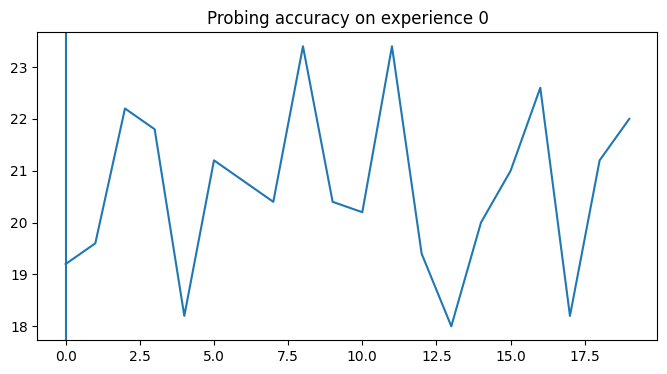

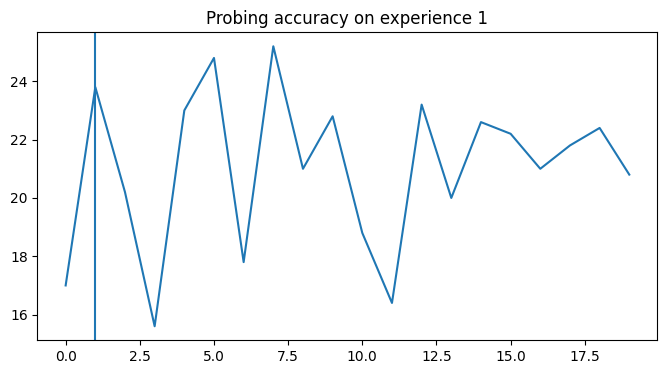

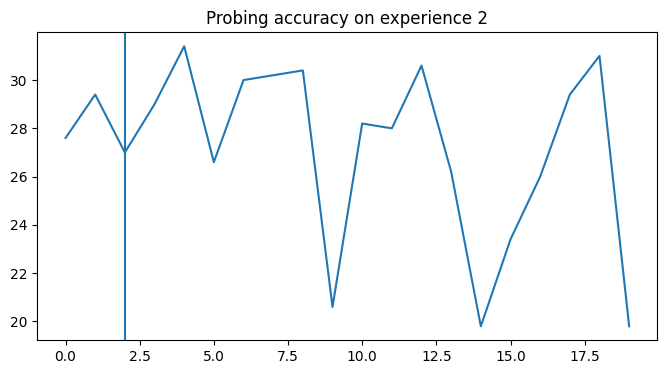

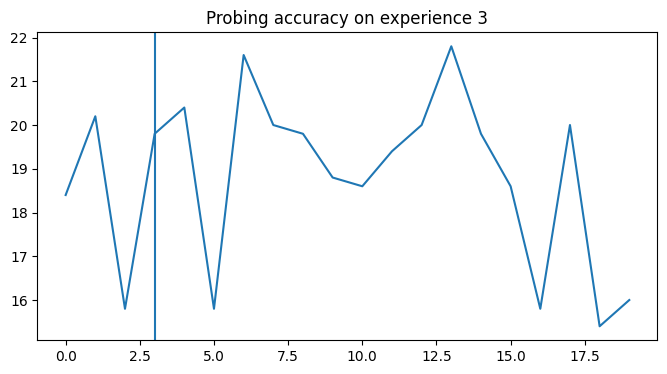

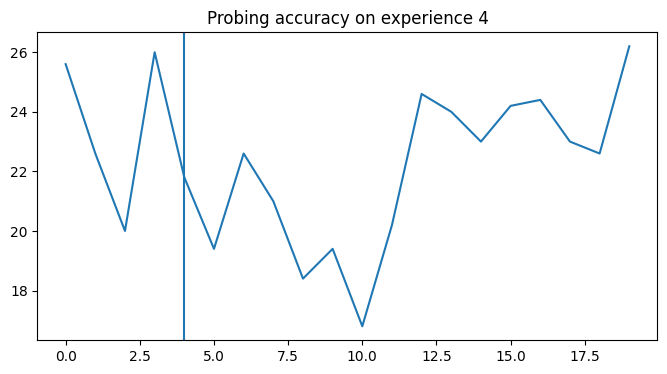

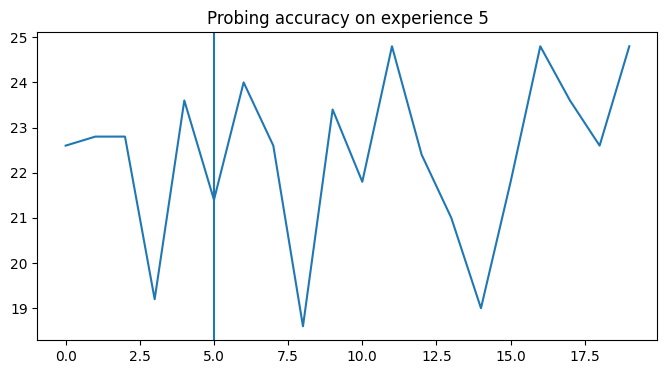

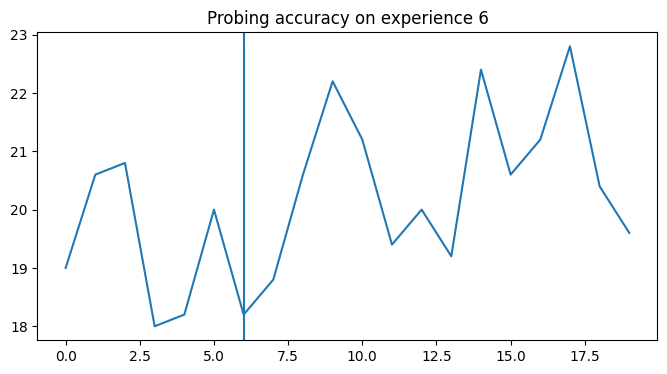

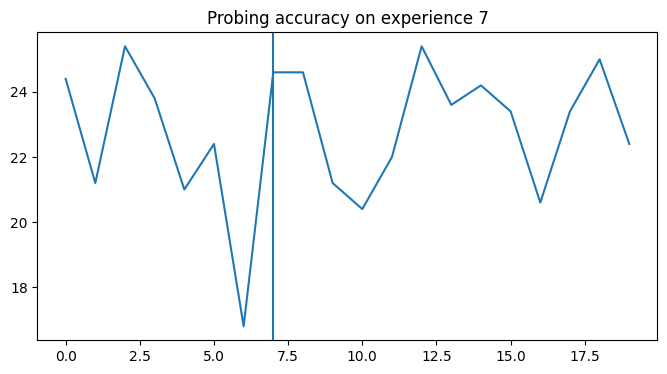

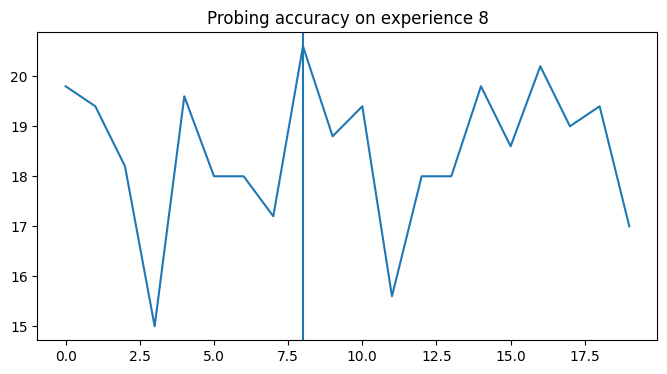

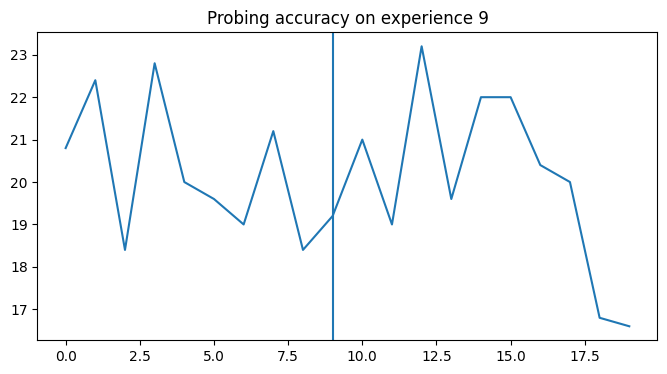

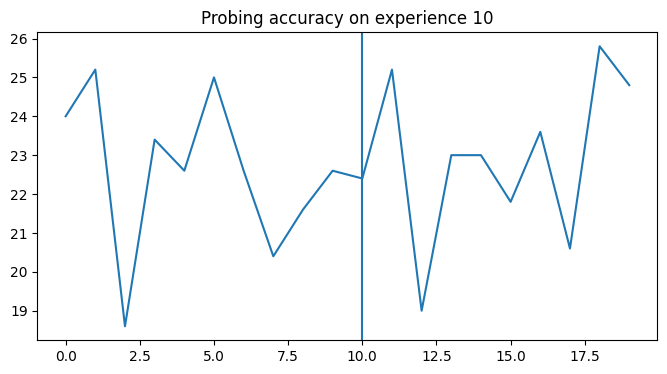

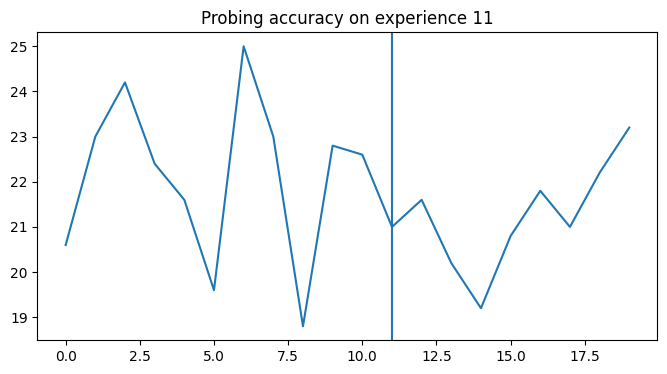

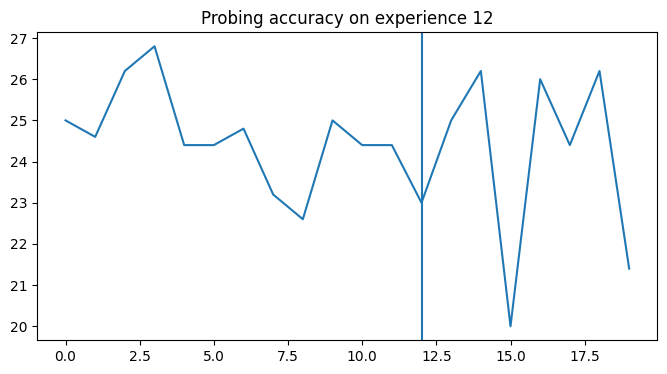

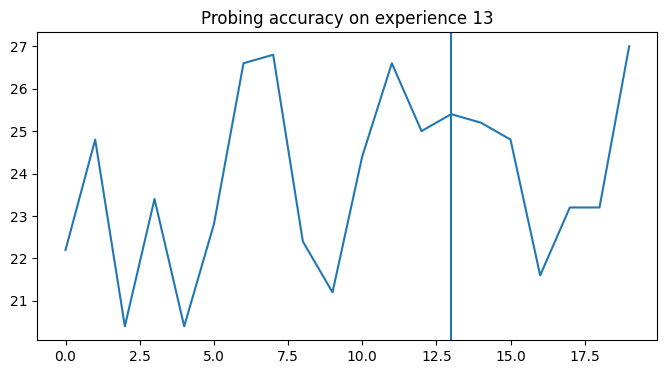

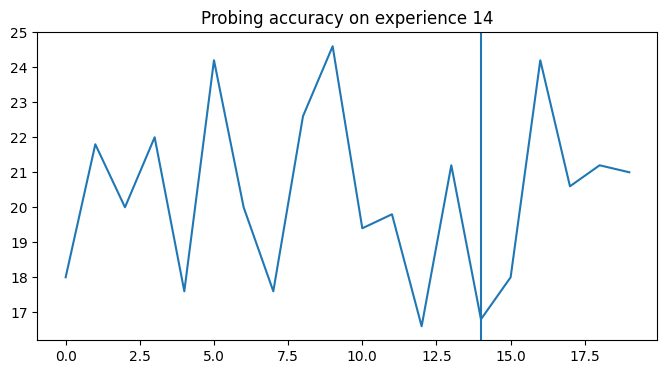

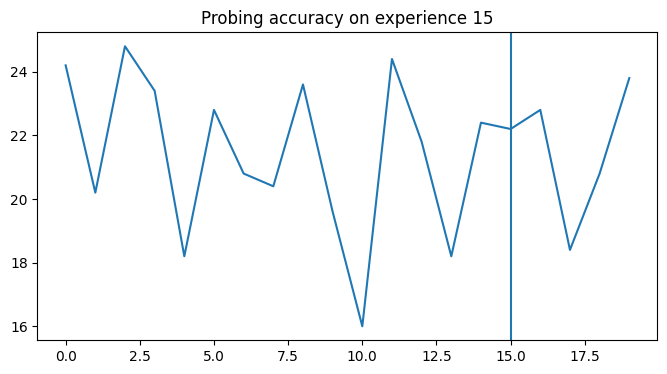

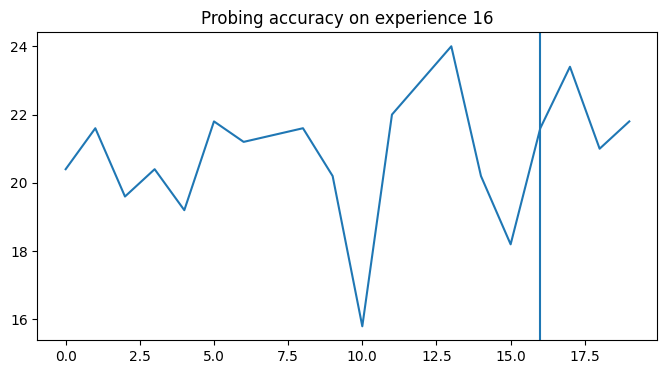

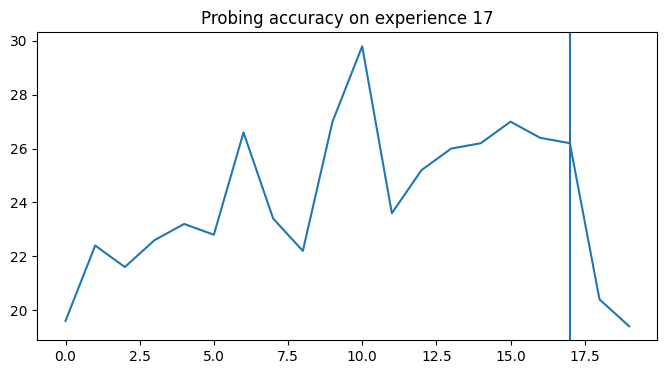

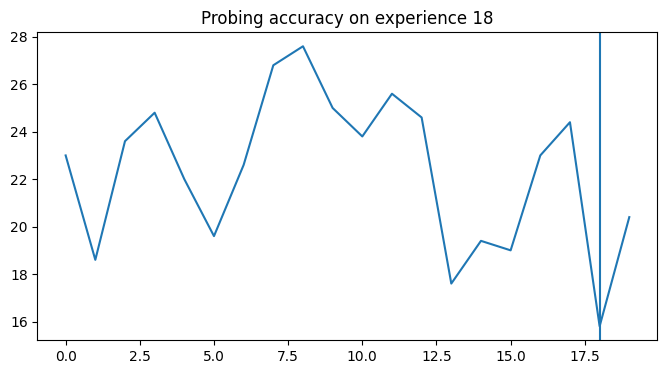

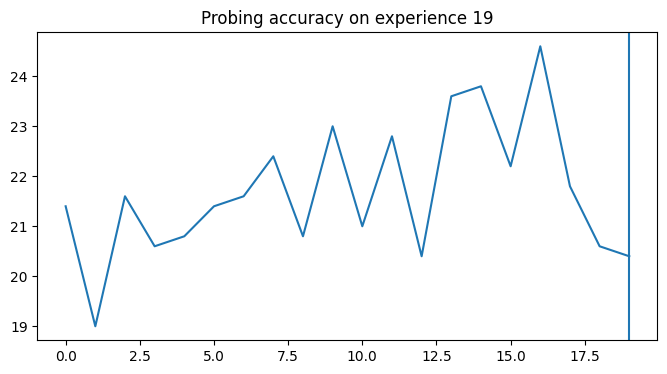

In [9]:
for probing_exp_idx, df in grouped_df:
    fig = plt.figure(figsize=(8, 4))

    plt.plot(df['test_acc'].to_list(), label=f'Probe on exp {probing_exp_idx}')

    plt.title(f'Probing accuracy on experience {probing_exp_idx}')
    # Plot a vertical line at exp_idx, same color 
    plt.axvline(x=probing_exp_idx, color=plt.gca().lines[-1].get_color())

    plt.show()

#plt.legend()
#plt.show()
